# Hello world of neural networks

## Quick overview of a simple feedforward neural network

A neural network is a type of machine learning algorythm which models itself after the human brain, creating an artificial neural network that allows the computer to learn by incorporating new data.

![Picture of a neural network](pictures/NN_schema.png)

Each circle in the above diagram is called a **neuron**. 

Each neuron has an **activation function**.

Most of the basic neural networks have an **input layer**, at least one **hidden layer** and and **output layer**. 

The arrows in the above diagram are called **connections**. Each connection provides the output of one neuron as an input to another neuron. Each connection is assigned a **weight** that represents its relative importance.

Given an input, the network **forward propagates** the data via all the network and makes a prediction of $\hat{y}$ and an error is calculated, for example, $E:=(y - \hat{y})^{2}$. Then, during **backpropogation**, all the weights of the network are readjusted in such a way that the connections that had the biggest impact to the error are diminished. 

One iteration of feedforward and backpropogation is called an **epoch**. 

There are a lot of resources that explain every bolded term. I will assume that the reader has at least an intuitive understanding of the concepts of deep learning and focus more on the implementation of neural networks in tensorflow and keras. 

## Tensorflow and Keras

TensorFlow (**tf** for short) is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. 

As the name suggests, tensorflow deal with the *flow* of *tensors*. The flow represents the forward and back propogations and tensors are data represented as tensors.

Throughout every notebook, I will be using tensorflow version **2.0.1**. 

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

To summarize, one can view the relationship between tensorflow and keras as tensorflow beeing used for deep calculations in the computer backend and keras is an API to query the backend.

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.1


## A very simple neural network

Imagine we see the numbers [0, 1, 2, 3, 4, 5] and [-1, 1, 3, 5, 7, 9]. If I asked you to come up with a rule that links the first list of numbers with the second, how would you do it? Maybe you would look at the 0 and -1 pair and start your deduction from there. Then you would analyze the pair of 1 and 1 and so on. 

The rule is that the second list of numbers are made by multiplying the first list numbers and subtracting one. The process of thinking of the rule, iterating through all the numbers in your head, going back and forth and seeing how good does your rule fit the data is a very similar process what a deep learning algorythm does. 

I will create a single layered neural network to solve this issue. As it turns out, to get good results, a very simple neural network is sufficient.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Function definition:

$$y:= f(x) = x * 2 - 1$$

Function definition in python:

In [3]:
def f(x) -> float: 
    """
    A simple function
    """
    return x * 2 - 1

Creating points in python:

In [4]:
xs = [0, 1, 2, 3, 4, 5]
ys = [f(x) for x in xs]

In [5]:
print(f"""x: {xs}   f(x): {ys}""")

x: [0, 1, 2, 3, 4, 5]   f(x): [-1, 1, 3, 5, 7, 9]


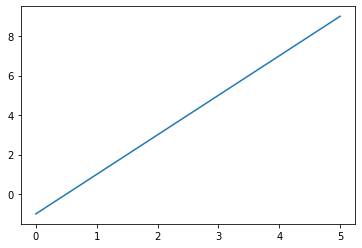

In [6]:
plt.plot(xs, ys)
plt.show()

Defining a neural network with tensorflow and keras in python:

In [7]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


The above neural network will have one input neuron and one hidden layer. 

**tf.keras.Sequantial** initiates a sequantial model, which is just a simple feedfoward fully connected neural network. 

**keras.layer.Dense** creates a layer of neurons (just one in this case) with a precoded input shape.

In [9]:
model.compile(optimizer='sgd', loss='mean_squared_error')

The term 'sgd' stands for stochastic gradient descent. The loss function is 
$$loss(y, \hat{y}) =  \dfrac{1}{n} \sum (y - \hat{y})^{2}$$

I will wrap everything into a function: 

In [10]:
def approx_f(xs, ys, epochs):
    """
    A method to train a neural network
    """
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer='sgd', loss='mean_squared_error')
    model.fit(xs, ys, epochs=epochs)
    
    return model

In [11]:
model = approx_f(xs, ys, 100)

Train on 6 samples
Epoch 1/100
6/6 [==============================] - 0s 55ms/sample - loss: 42.9004
Epoch 2/100
6/6 [==============================] - 0s 1ms/sample - loss: 27.9005
Epoch 3/100
6/6 [==============================] - 0s 1ms/sample - loss: 18.2356
Epoch 4/100
6/6 [==============================] - 0s 997us/sample - loss: 12.0070
Epoch 5/100
6/6 [==============================] - 0s 1ms/sample - loss: 7.9919
Epoch 6/100
6/6 [==============================] - 0s 995us/sample - loss: 5.4026
Epoch 7/100
6/6 [==============================] - 0s 998us/sample - loss: 3.7318
Epoch 8/100
6/6 [==============================] - 0s 1ms/sample - loss: 2.6526
Epoch 9/100
6/6 [==============================] - 0s 997us/sample - loss: 1.9545
Epoch 10/100
6/6 [==============================] - 0s 831us/sample - loss: 1.5020
Epoch 11/100
6/6 [==============================] - 0s 831us/sample - loss: 1.2076
Epoch 12/100
6/6 [==============================] - 0s 850us/sample - loss: 1.0152

Epoch 100/100
6/6 [==============================] - 0s 831us/sample - loss: 0.2401


After each epoch we can see the loss function's value. In general, this value should decrease with every epoch. If the value is not decreasing that means that either we are starting to overfit, something is wrong with the model specifications or the X values are not suitable to explain the Y values. 

In [12]:
model.predict([6])[0]

array([10.4040575], dtype=float32)

In [13]:
f(6)

11

As we can see, the true value of the function with x=6 is close to the predicted value of our neural network. By increasing the number of epochs, we can achieve better accuracy. The reader can play around with changing the number of epochs. At around 1 thousand epochs, the predicted value should be very very near 11.